# Funnel Analysis
## Goal
The goal is to perform funnel analysis for an e-commerce website.
Typically, websites have a clear path to conversion: for instance, you land on the home page,
then you search, select a product, and buy it. At each of these steps, some users will drop o"
and leave the site. The sequence of pages that lead to conversion is called 'funnel'.
Data Science can have a tremendous impact on funnel optimization. Funnel analysis allows to
understand where/when our users abandon the website. It gives crucial insights on user
behavior and on ways to improve the user experience. Also, it often allows to discover bugs.
## Challenge Description
You are looking at data from an e-commerce website. The site is very simple and has just 4
pages:
The first page is the home page. When you come to the site for the first time, you can
only land on the home page as a first page.
From the home page, the user can perform a search and land on the search page.
From the search page, if the user clicks on a product, she will get to the payment page,
where she is asked to provide payment information in order to buy that product.
If she does decide to buy, she ends up on the confirmation page
The company CEO isn't very happy with the ]VS\TL VM sales and, especially, VM sales coming
from new users. Therefore, she asked you to investigate whether there is something wrong in
the conversion funnel or, in general, if you could suggest how conversion rate can be improved.
Specifically, she is interested in :
A full picture of funnel conversion rate for both desktop and mobile
Some insights on what the product team should focus on in order to improve
conversion rate as well as anything you might discover that could help improve


In [18]:
%matplotlib inline
import pandas as pd
from os import listdir
from matplotlib import pyplot as plt
import numpy as np
import glob, re
import seaborn as sns
from datetime import datetime,date

## LOAD DATA

In [2]:
%%bash
ls data/

home_page_table.csv
payment_confirmation_table.csv
payment_page_table.csv
search_page_table.csv
user_table.csv


In [3]:
dfs = { re.search('/([^/\.]*)\.csv', fn).group(1):pd.read_csv(fn) for fn in glob.glob('data/*.csv')}
print('data frames read:{}'.format(list(dfs.keys())))

print('local variables with the same names are created.')
for k, v in dfs.items(): locals()[k] = v

data frames read:['user_table', 'home_page_table', 'search_page_table', 'payment_confirmation_table', 'payment_page_table']
local variables with the same names are created.


In [4]:
data = user_table

for k, v in dfs.items():
    print(k)
    print(v.head())
    print(v.shape)
    print(v['user_id'].nunique())
    if k!='user_table':
        data = data.merge(right=v.rename(index=str,columns={'page':k.split('_table')[0]}),on='user_id',how='left')

user_table
   user_id        date   device     sex
0   450007  2015-02-28  Desktop  Female
1   756838  2015-01-13  Desktop    Male
2   568983  2015-04-09  Desktop    Male
3   190794  2015-02-18  Desktop  Female
4   537909  2015-01-15  Desktop    Male
(90400, 4)
90400
home_page_table
   user_id       page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page
(90400, 2)
90400
search_page_table
   user_id         page
0    15866  search_page
1   347058  search_page
2   577020  search_page
3   780347  search_page
4   383739  search_page
(45200, 2)
45200
payment_confirmation_table
   user_id                       page
0   123100  payment_confirmation_page
1   704999  payment_confirmation_page
2   407188  payment_confirmation_page
3   538348  payment_confirmation_page
4   841681  payment_confirmation_page
(452, 2)
452
payment_page_table
   user_id          page
0   253019  payment_page
1   310478  payment_page
2   304081  payment_page
3

In [5]:
data.head()

,user_id,date,device,sex,home_page,search_page,payment_confirmation,payment_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


## Exploratory data analysis

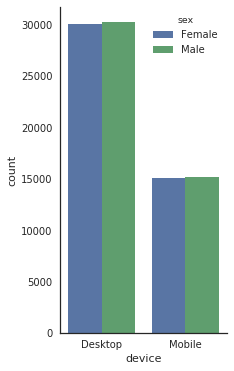

In [6]:
plt.figure(figsize=(3,6))
sns.set(style='white')
ax = sns.countplot(x='device', hue='sex',data=data)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.grid(False)

In [7]:
data.dtypes

user_id                  int64
date                    object
device                  object
sex                     object
home_page               object
search_page             object
payment_confirmation    object
payment_page            object
dtype: object

In [8]:
data['date'] = pd.to_datetime(data['date'])
data['date']=data['date'].dt.date
print(data['date'].describe())
print(data['date'].min())
print(data['date'].max())

count          90400
unique           120
top       2015-02-08
freq             877
Name: date, dtype: object
2015-01-01
2015-04-30


## Funnel analysis for desktop users

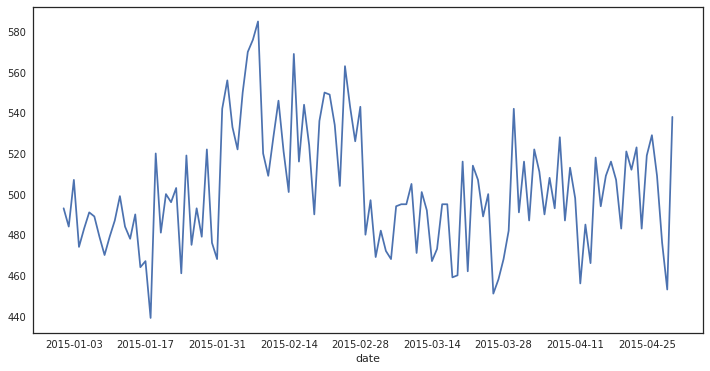

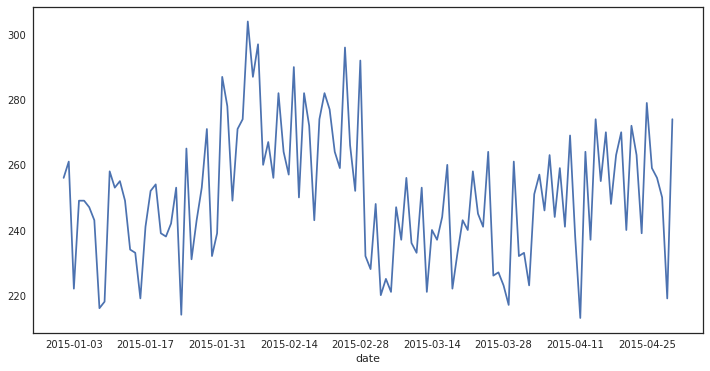

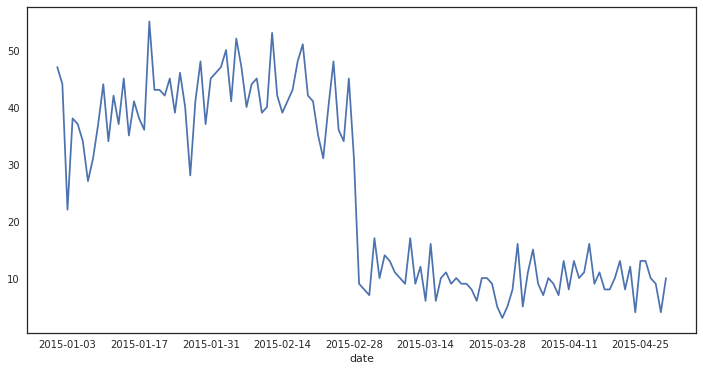

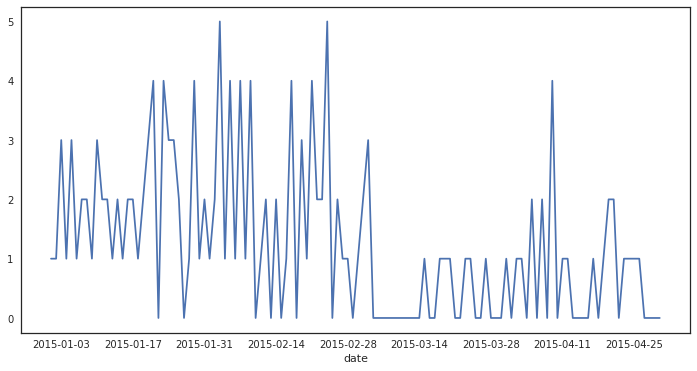

In [65]:
date_groupby = data[(data.device=='Desktop')].groupby('date').count()
plt.figure(figsize=(12,6))
date_groupby['home_page'].plot()
plt.figure(figsize=(12,6))
date_groupby['search_page'].plot()
plt.figure(figsize=(12,6))
date_groupby['payment_page'].plot()
plt.figure(figsize=(12,6))
date_groupby['payment_confirmation'].plot()

## Funnel analysis for mobile users

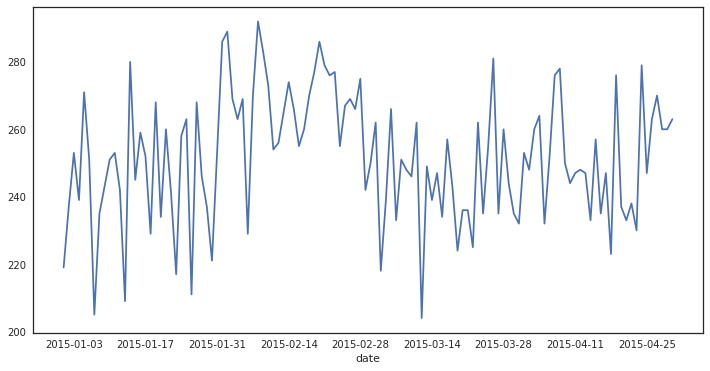

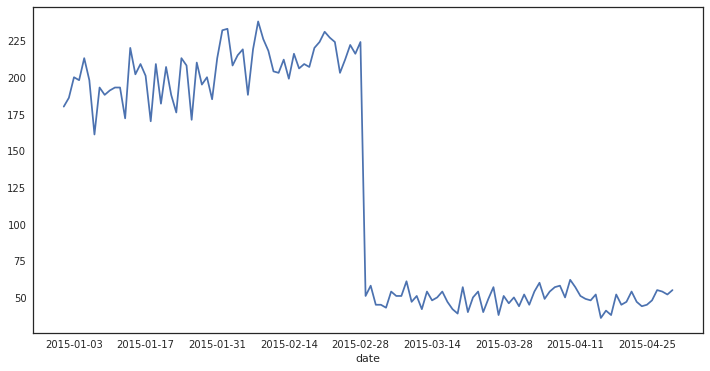

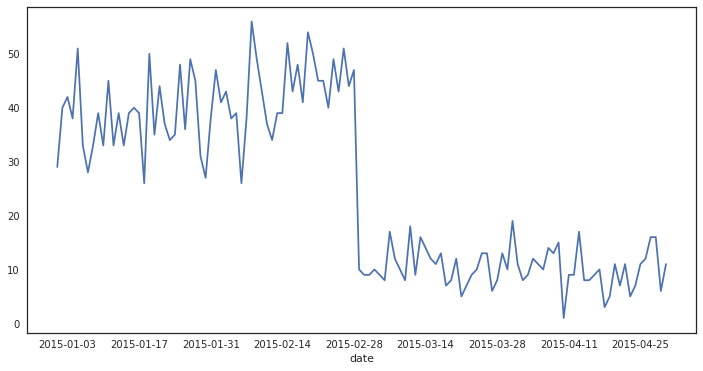

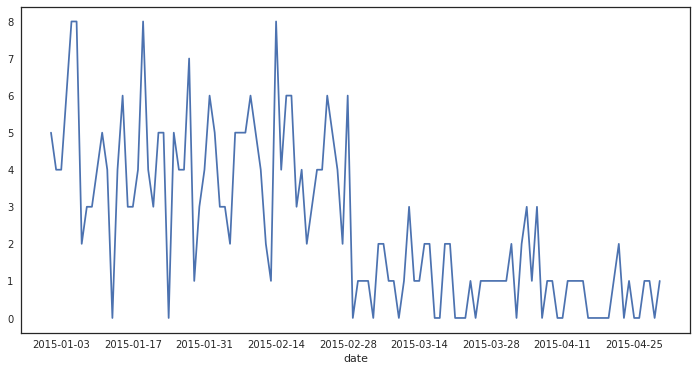

In [64]:
date_groupby = data[(data.device=='Mobile')].groupby('date').count()
plt.figure(figsize=(12,6))
date_groupby['home_page'].plot()
plt.figure(figsize=(12,6))
date_groupby['search_page'].plot()
plt.figure(figsize=(12,6))
date_groupby['payment_page'].plot()
plt.figure(figsize=(12,6))
date_groupby['payment_confirmation'].plot()

In [47]:
date_groupby[date_groupby.index>date(2015,2,3)].head()

,user_id,device,sex,home_page,search_page,payment_confirmation,payment_page
date,,,,,,,
2015-02-04,522,522,522,522,271,1,41
2015-02-05,550,550,550,550,274,4,52
2015-02-06,570,570,570,570,304,1,47
2015-02-07,576,576,576,576,287,4,40
2015-02-08,585,585,585,585,297,1,44


### How does the desktop/mobile male/female ratio change over time?
According to analysis below there doesnot seem to be a change over the ratio of male/females or desktop/mobile users.

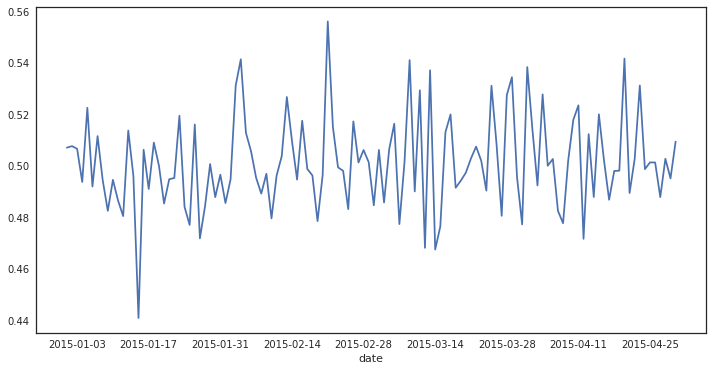

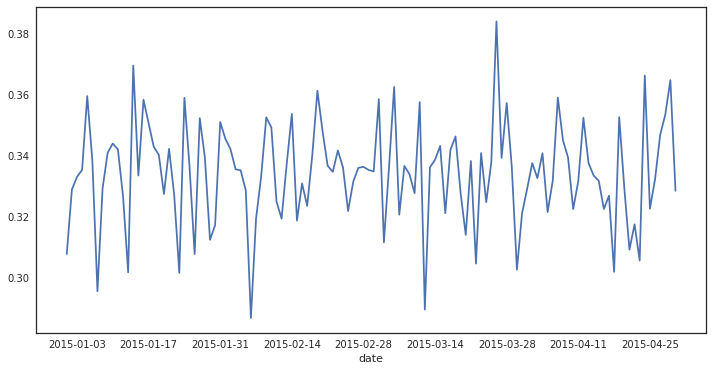

In [60]:
data_cats = data.copy()
data_cats['sex'] = data_cats['sex'].factorize()[0]
data_cats['device'] = data_cats['device'].factorize()[0]
plt.figure(figsize=(12,6))
data_cats.groupby('date')['sex'].mean().plot()
plt.figure(figsize=(12,6))
data_cats.groupby('date')['device'].mean().plot()

### Conversion rate mobile vs desktop:

0.00990620064192
0.0024774113984


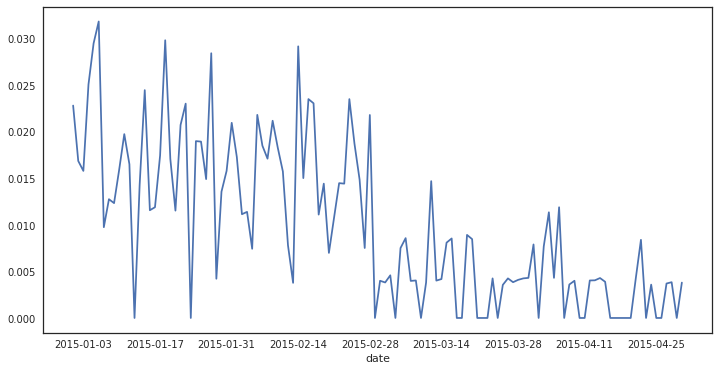

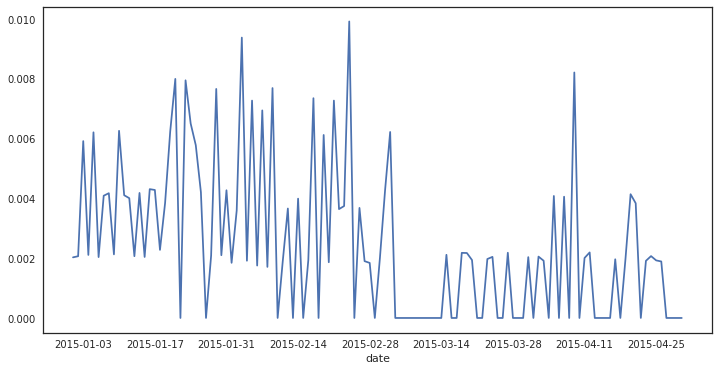

In [68]:
date_groupby = data[(data.device=='Mobile')].groupby('date').count()
plt.figure(figsize=(12,6))
(date_groupby['payment_confirmation']/date_groupby['home_page']).plot()
date_groupby = data[(data.device=='Desktop')].groupby('date').count()
plt.figure(figsize=(12,6))
(date_groupby['payment_confirmation']/date_groupby['home_page']).plot()

In [72]:
date_groupby = data[(data.device=='Mobile')&(data['date']<date(2015,2,25))].groupby('date').count()
print('conversion rate for desktop',(date_groupby['payment_confirmation']/date_groupby['home_page']).mean())
date_groupby = data[(data.device=='Desktop')&(data['date']<date(2015,2,25))].groupby('date').count()
print('conversion rate for mobile',(date_groupby['payment_confirmation']/date_groupby['home_page']).mean())

conversion rate for desktop 0.0164594461059
conversion rate for mobile 0.00393604411361


# Conclusion

 1. It is very clear that there is no change in number of users coming to the site. However, for mobile users there is a problem moving from homepage to searchpage, but for desktop users there is a problem moving from search page to payment confirmation page. When exactly does this problem appear? For both mobile users and desktop user something happened at the beginning of march. To fix this problem these page transitions need to be analyzed and fixed. Also for some reason, there is a slight increase in traffic from Desktop users to the site on 2015-02-25. 

2. Conversion rate is very low for desktop users vs. mobile users, even tough the site is visited more by desktop users. This is also not related to recent problems with the website, it looks like situation was always like this. Why are the conversion rate of desktop users so low? Can we do something to increase conversion there?